# Simple SIR
This is the Python version of program 2.1 from page 19 of "Modeling Infectious Disease in humans and animals" by Keeling & Rohani.
This is based on code written by Ilias Soumpasis.

In [12]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Parameters (rates here are specified in terms of days)
beta=1.4247  #transmission rate
gamma=0.14286 #recovery rate

TS=1.0  #time step for integration
ND=70.0 #number of days (end of simulation)

S0=1-1e-6 #initial proportion of the population that is susceptible
I0=1e-6   #initial proportion of the population that is infected
INPUT = (S0, I0, 0.0) #initial conditions

In [3]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP    
	Y[0] = - beta * V[0] * V[1]
	Y[1] = beta * V[0] * V[1] - gamma * V[1]
	Y[2] = gamma * V[1]
	return Y   # For odeint

In [4]:
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

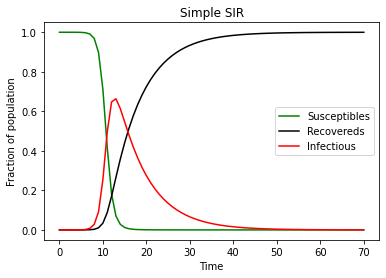

In [15]:
#Ploting
fig = plt.figure()
plt.plot(RES[:,0], '-g', label='Susceptibles')
plt.plot(RES[:,2], '-k', label='Recovereds')
plt.plot(RES[:,1], '-r', label='Infectious')
plt.legend(loc='best')
plt.title('Simple SIR')
plt.xlabel('Time')
plt.ylabel('Fraction of population')
plt.show()
fig.savefig('Simple_SIR.pdf')